In [1]:
shape_cat=""
vol=""
z_range=""

In [2]:
# Parameters
shape_cat = "im3"
vol = "all"
z_range = "high_z"


In [3]:
#This header file contains all the common packages
%matplotlib inline
%run /home/cz136/project/sa/lib/src/header.py $shape_cat $vol $z_range 

In [4]:
sep="------------------------------------------------------------------------------"
np.set_printoptions(precision=4)

In [5]:
NBINS=10

In [6]:
import treecorr
import astropy.cosmology
from fastprogress import master_bar, progress_bar
from ipywidgets import FloatProgress
from IPython.display import display
from tqdm import tqdm

In [7]:
assert np.isin(shapes['All','MEM_MATCH_ID'].to_numpy(),clusters.index.to_numpy()).all()==True

In [8]:
def get_ng(cluster,mode1,mode2):
    if mode2=="abs":
        UPPER_BOUND=np.max(shapes[('All','R')])
        distance=('All','angR')
        
    elif mode2=="rel":
        UPPER_BOUND=1.2
        distance=('All','normLR')
    else:
        raise

    if mode1 == "s":
        def get_cluster_cen(cluster):
            cen_id=cluster[('Alt','Alt1','ID_CENT')]
            return (shapes.loc[cen_id])
        def get_cluster_sats(cluster):
            cen_mat_id=cluster.name
            cen_id=cluster[('Alt','Alt1','ID_CENT')]
            sats=shapes[shapes['All','MEM_MATCH_ID']==cen_mat_id]
            sats=sats[sats.index!=cen_id]
            return (sats)
    elif mode1=='r':
        def get_cluster_sats(cluster):
            return(shapes)
        def get_cluster_cen(cluster):
            return (random)

    else:
        raise


    cen=get_cluster_cen(cluster)
    sats=get_cluster_sats(cluster)


    sats_e1=sats[('All','e1')].to_numpy()
    sats_e2=sats[('All','e2')].to_numpy()
    sats_angr=sats[distance]

#     print(sats_e1,sats_e2)

    if type(cen[('All','RA')])==np.float64:
        cen_angr=np.array(cen[distance]).reshape(1)
        cen_ra=np.array(cen[('All','RA')]).reshape(1)
        cen_dec=np.array(cen[('All','DEC')]).reshape(1)
    else:
#         cen_e1=cen[('All','e1')].to_numpy
#         cen_e2=cen[('All','e2')].to_numpy()
        cen_angr=cen[distance].to_numpy()
        cen_ra=cen[('All','RA')].to_numpy()
        cen_dec=cen[('All','DEC')].to_numpy()




#     print(cen_e1,cen_e2)

    sats_ra=sats[('All','RA')].to_numpy()
    sats_dec=sats[('All','DEC')].to_numpy()




#     print(np.shape(cen_ra),np.shape(cen_dec))    
#     print(cen_ra,cen_dec)    

    sats_cat = treecorr.Catalog( g1 = sats_e1, g2   = sats_e2, 
                                 ra = sats_ra, dec = sats_dec,r=sats_angr,
                                 ra_units='deg', dec_units='deg')

    cen_cat = treecorr.Catalog( 
                                 ra = cen_ra, dec = cen_dec, r=cen_angr,
                                 ra_units='deg', dec_units='deg')

    ng = treecorr.NGCorrelation(nbins=NBINS, min_sep=0.01, max_sep=UPPER_BOUND, bin_slop=0.0,
                               metric="Rperp")
    ng.process_cross(cen_cat,sats_cat)

    return(ng)

In [9]:
def get_xi_meanlogr_varxi_npairs(cluster,mode1,mode2):
    ng=get_ng(cluster,mode1,mode2)
    return(np.array([ng.xi,ng.meanlogr,ng.varxi,ng.npairs]))

In [10]:
length=len(clusters)

def get_ng_list(mode2):
    ng_list=np.empty([length,4,NBINS])
    filler=np.zeros([1,4,NBINS])

    i=0
    e_count=0
    for index,cluster in tqdm(clusters.iterrows()):
        try:
            ng_list[i,:,:]=get_xi_meanlogr_varxi_npairs(cluster,'s',mode2)
            i=i+1
        except ValueError as e:
            ng_list[i,:,:]=filler
            i=i+1
            e_count=e_count+1
    print("Number of empty sat catalogs is {}".format(e_count))
    return (ng_list)

In [11]:
ng_abs=get_ng_list('abs')
ng_rel=get_ng_list('rel')

0it [00:00, ?it/s]

9it [00:00, 84.33it/s]

19it [00:00, 86.59it/s]

29it [00:00, 88.12it/s]

39it [00:00, 89.51it/s]

49it [00:00, 90.32it/s]

59it [00:00, 90.57it/s]

69it [00:00, 90.63it/s]

79it [00:00, 90.84it/s]

89it [00:00, 91.22it/s]

98it [00:01, 90.51it/s]

108it [00:01, 90.57it/s]

117it [00:01, 90.21it/s]

126it [00:01, 90.01it/s]

135it [00:01, 89.97it/s]

145it [00:01, 90.16it/s]

154it [00:01, 90.08it/s]

163it [00:01, 90.03it/s]

172it [00:01, 89.75it/s]

181it [00:02, 89.52it/s]

190it [00:02, 89.58it/s]

200it [00:02, 89.71it/s]

210it [00:02, 90.09it/s]

220it [00:02, 90.50it/s]

230it [00:02, 90.79it/s]

240it [00:02, 91.01it/s]

250it [00:02, 91.24it/s]

260it [00:02, 91.36it/s]

270it [00:02, 91.43it/s]

280it [00:03, 91.29it/s]

290it [00:03, 91.55it/s]

300it [00:03, 91.77it/s]

310it [00:03, 92.00it/s]

320it [00:03, 90.96it/s]

330it [00:03, 90.58it/s]

340it [00:03, 90.13it/s]

350it [00:03, 90.49it/s]

360it [00:03, 90.93it/s]

370it [00:04, 91.12it/s]

380it [00:04, 91.80it/s]

390it [00:04, 91.83it/s]

400it [00:04, 91.93it/s]

410it [00:04, 92.02it/s]

420it [00:04, 91.89it/s]

430it [00:04, 91.65it/s]

440it [00:04, 91.93it/s]

450it [00:04, 92.27it/s]

460it [00:05, 92.29it/s]

470it [00:05, 92.30it/s]

480it [00:05, 92.39it/s]

490it [00:05, 92.37it/s]

500it [00:05, 92.47it/s]

510it [00:05, 92.48it/s]

520it [00:05, 92.50it/s]

530it [00:05, 92.51it/s]

540it [00:05, 92.47it/s]

550it [00:06, 92.39it/s]

560it [00:06, 92.03it/s]

570it [00:06, 92.01it/s]

580it [00:06, 92.10it/s]

590it [00:06, 91.28it/s]

600it [00:06, 90.73it/s]

610it [00:06, 90.33it/s]

620it [00:06, 90.24it/s]

630it [00:06, 89.87it/s]

640it [00:07, 90.53it/s]

650it [00:07, 90.76it/s]

660it [00:07, 91.06it/s]

670it [00:07, 91.15it/s]

680it [00:07, 91.38it/s]

690it [00:07, 91.52it/s]

700it [00:07, 91.41it/s]

710it [00:07, 91.77it/s]

720it [00:07, 91.58it/s]

730it [00:08, 91.74it/s]

740it [00:08, 91.91it/s]

750it [00:08, 92.21it/s]

760it [00:08, 92.16it/s]

770it [00:08, 92.06it/s]

780it [00:08, 91.80it/s]

790it [00:08, 91.87it/s]

800it [00:08, 91.66it/s]

810it [00:08, 91.88it/s]

820it [00:08, 92.02it/s]

830it [00:09, 92.24it/s]

841it [00:09, 94.54it/s]

851it [00:09, 93.94it/s]

861it [00:09, 93.44it/s]

871it [00:09, 93.00it/s]

881it [00:09, 92.72it/s]

891it [00:09, 92.28it/s]

901it [00:09, 92.21it/s]

911it [00:09, 92.12it/s]

921it [00:10, 91.93it/s]

931it [00:10, 91.92it/s]

941it [00:10, 91.95it/s]

951it [00:10, 92.09it/s]

961it [00:10, 92.03it/s]

971it [00:10, 92.00it/s]

981it [00:10, 91.93it/s]

991it [00:10, 91.83it/s]

1001it [00:10, 91.09it/s]

1011it [00:11, 90.95it/s]

1021it [00:11, 91.12it/s]

1031it [00:11, 91.07it/s]

1041it [00:11, 91.35it/s]

1051it [00:11, 91.35it/s]

1061it [00:11, 91.38it/s]

1071it [00:11, 91.23it/s]

1081it [00:11, 91.47it/s]

1091it [00:11, 91.64it/s]

1101it [00:12, 91.60it/s]

1111it [00:12, 91.60it/s]

1121it [00:12, 91.65it/s]

1131it [00:12, 91.81it/s]

1141it [00:12, 91.75it/s]

1151it [00:12, 93.91it/s]

1161it [00:12, 93.55it/s]

1171it [00:12, 93.25it/s]

1181it [00:12, 92.81it/s]

1191it [00:13, 92.87it/s]

1201it [00:13, 92.60it/s]

1211it [00:13, 94.52it/s]

1221it [00:13, 93.63it/s]

1231it [00:13, 93.26it/s]

1241it [00:13, 92.86it/s]

1251it [00:13, 92.27it/s]

1261it [00:13, 91.29it/s]

1271it [00:13, 91.67it/s]

1281it [00:13, 91.70it/s]

1291it [00:14, 91.72it/s]

1301it [00:14, 93.80it/s]

1311it [00:14, 93.22it/s]

1321it [00:14, 92.74it/s]

1331it [00:14, 92.12it/s]

1341it [00:14, 92.00it/s]

1351it [00:14, 91.67it/s]

1361it [00:14, 91.27it/s]

1371it [00:14, 91.43it/s]

1381it [00:15, 91.67it/s]

1391it [00:15, 91.94it/s]

1401it [00:15, 92.00it/s]

1411it [00:15, 92.09it/s]

1421it [00:15, 92.24it/s]

1431it [00:15, 91.27it/s]

1441it [00:15, 91.31it/s]

1451it [00:15, 91.58it/s]

1461it [00:15, 91.81it/s]

1471it [00:16, 91.85it/s]

1481it [00:16, 91.39it/s]

1491it [00:16, 91.31it/s]

1501it [00:16, 91.22it/s]

1511it [00:16, 91.39it/s]

1521it [00:16, 91.67it/s]

1531it [00:16, 91.98it/s]

1541it [00:16, 91.92it/s]

1551it [00:16, 91.87it/s]

1561it [00:17, 91.78it/s]

1571it [00:17, 91.74it/s]

1581it [00:17, 91.67it/s]

1591it [00:17, 91.47it/s]

1601it [00:17, 91.68it/s]

1611it [00:17, 91.56it/s]

1621it [00:17, 91.78it/s]

1631it [00:17, 91.91it/s]

1641it [00:17, 91.99it/s]

1651it [00:18, 92.13it/s]

1661it [00:18, 92.15it/s]

1671it [00:18, 92.34it/s]

1681it [00:18, 92.42it/s]

1691it [00:18, 92.47it/s]

1701it [00:18, 92.30it/s]

1711it [00:18, 94.26it/s]

1721it [00:18, 93.98it/s]

1732it [00:18, 95.78it/s]

1742it [00:18, 95.18it/s]

1752it [00:19, 94.65it/s]

1762it [00:19, 94.05it/s]

1772it [00:19, 93.66it/s]

1782it [00:19, 93.23it/s]

1792it [00:19, 93.23it/s]

1802it [00:19, 93.20it/s]

1812it [00:19, 93.28it/s]

1822it [00:19, 93.27it/s]

1832it [00:19, 93.27it/s]

1842it [00:20, 93.24it/s]

1852it [00:20, 93.28it/s]

1862it [00:20, 93.37it/s]

1873it [00:20, 95.33it/s]

1884it [00:20, 96.93it/s]

1894it [00:20, 95.31it/s]

1904it [00:20, 94.33it/s]

1914it [00:20, 93.62it/s]

1924it [00:20, 95.37it/s]

1934it [00:21, 94.18it/s]

1944it [00:21, 93.78it/s]

1954it [00:21, 93.34it/s]

1964it [00:21, 93.18it/s]

1974it [00:21, 92.91it/s]

1984it [00:21, 92.54it/s]

1994it [00:21, 92.72it/s]

2004it [00:21, 92.82it/s]

2014it [00:21, 92.72it/s]

2025it [00:21, 94.69it/s]

2035it [00:22, 94.04it/s]

2045it [00:22, 93.14it/s]

2055it [00:22, 92.68it/s]

2065it [00:22, 94.69it/s]

2075it [00:22, 93.92it/s]

2085it [00:22, 95.57it/s]

2095it [00:22, 94.59it/s]

2105it [00:22, 93.87it/s]

2115it [00:22, 93.26it/s]

2125it [00:23, 92.58it/s]

2135it [00:23, 92.55it/s]

2146it [00:23, 94.54it/s]

2157it [00:23, 96.05it/s]

2167it [00:23, 94.53it/s]

2177it [00:23, 93.67it/s]

2188it [00:23, 95.39it/s]

2198it [00:23, 94.58it/s]

2208it [00:23, 96.13it/s]

2218it [00:24, 94.85it/s]

2228it [00:24, 93.97it/s]

2238it [00:24, 93.07it/s]

2248it [00:24, 94.84it/s]

2258it [00:24, 93.79it/s]

2268it [00:24, 93.12it/s]

2278it [00:24, 92.71it/s]

2288it [00:24, 92.63it/s]

2298it [00:24, 92.58it/s]

2308it [00:25, 92.34it/s]

2319it [00:25, 96.47it/s]

2329it [00:25, 94.95it/s]

2339it [00:25, 93.84it/s]

2349it [00:25, 93.28it/s]

2359it [00:25, 92.74it/s]

2369it [00:25, 92.47it/s]

2379it [00:25, 92.45it/s]

2389it [00:25, 92.47it/s]

2399it [00:25, 92.42it/s]

2409it [00:26, 92.29it/s]

2419it [00:26, 92.34it/s]

2429it [00:26, 92.01it/s]

2439it [00:26, 92.05it/s]

2449it [00:26, 92.09it/s]

2459it [00:26, 92.10it/s]

2469it [00:26, 91.82it/s]

2479it [00:26, 91.56it/s]

2489it [00:26, 91.43it/s]

2500it [00:27, 95.45it/s]

2510it [00:27, 94.19it/s]

2520it [00:27, 93.54it/s]

2531it [00:27, 95.29it/s]

2541it [00:27, 94.15it/s]

2551it [00:27, 95.69it/s]

2561it [00:27, 94.77it/s]

2571it [00:27, 93.61it/s]

2581it [00:27, 93.14it/s]

2591it [00:28, 92.58it/s]

2601it [00:28, 92.50it/s]

2611it [00:28, 92.38it/s]

2621it [00:28, 92.00it/s]

2631it [00:28, 92.00it/s]

2641it [00:28, 92.06it/s]

2651it [00:28, 92.14it/s]

2661it [00:28, 94.25it/s]

2671it [00:28, 93.41it/s]

2681it [00:29, 92.65it/s]

2691it [00:29, 92.60it/s]

2701it [00:29, 91.37it/s]

2711it [00:29, 91.36it/s]

2721it [00:29, 91.48it/s]

2731it [00:29, 93.73it/s]

2741it [00:29, 93.48it/s]

2751it [00:29, 92.93it/s]

2761it [00:29, 92.68it/s]

2771it [00:29, 92.27it/s]

2781it [00:30, 92.57it/s]

2792it [00:30, 94.91it/s]

2802it [00:30, 94.32it/s]

2812it [00:30, 93.97it/s]

2822it [00:30, 93.74it/s]

2832it [00:30, 93.38it/s]

2842it [00:30, 95.18it/s]

2853it [00:30, 96.54it/s]

2863it [00:30, 95.16it/s]

2873it [00:31, 94.43it/s]

2883it [00:31, 93.90it/s]

2893it [00:31, 93.65it/s]

2903it [00:31, 93.40it/s]

2914it [00:31, 95.26it/s]

2924it [00:31, 94.49it/s]

2935it [00:31, 96.03it/s]

2945it [00:31, 95.09it/s]

2955it [00:31, 94.13it/s]

2965it [00:32, 93.33it/s]

2975it [00:32, 92.82it/s]

2985it [00:32, 92.40it/s]

2995it [00:32, 94.52it/s]

3005it [00:32, 93.59it/s]

3015it [00:32, 95.04it/s]

3025it [00:32, 94.13it/s]

3035it [00:32, 93.68it/s]

3045it [00:32, 93.06it/s]

3055it [00:32, 94.96it/s]

3065it [00:33, 95.82it/s]

3076it [00:33, 98.88it/s]

3086it [00:33, 96.75it/s]

3096it [00:33, 97.38it/s]

3106it [00:33, 95.65it/s]

3116it [00:33, 94.45it/s]

3126it [00:33, 93.44it/s]

3136it [00:33, 93.01it/s]

3147it [00:33, 94.89it/s]

3157it [00:34, 96.22it/s]

3167it [00:34, 94.58it/s]

3178it [00:34, 96.04it/s]

3188it [00:34, 96.83it/s]

3198it [00:34, 95.25it/s]

3208it [00:34, 93.77it/s]

3218it [00:34, 94.80it/s]

3228it [00:34, 93.15it/s]

3238it [00:34, 94.69it/s]

3248it [00:35, 93.47it/s]

3258it [00:35, 94.85it/s]

3268it [00:35, 93.70it/s]

3278it [00:35, 92.80it/s]

3288it [00:35, 94.59it/s]

3298it [00:35, 93.76it/s]

3308it [00:35, 92.81it/s]

3318it [00:35, 94.62it/s]

3328it [00:35, 93.64it/s]

3338it [00:35, 91.62it/s]

3348it [00:36, 91.41it/s]

3359it [00:36, 93.73it/s]

3369it [00:36, 95.06it/s]

3379it [00:36, 96.36it/s]

3389it [00:36, 94.98it/s]

3399it [00:36, 93.82it/s]

3409it [00:36, 93.00it/s]

3419it [00:36, 94.99it/s]

3429it [00:36, 93.87it/s]

3439it [00:37, 95.28it/s]

3449it [00:37, 96.58it/s]

3459it [00:37, 95.40it/s]

3470it [00:37, 98.37it/s]

3480it [00:37, 98.50it/s]

3490it [00:37, 95.75it/s]

3501it [00:37, 98.45it/s]

3512it [00:37, 100.86it/s]

3523it [00:37, 97.81it/s] 

3533it [00:38, 95.53it/s]

3543it [00:38, 94.08it/s]

3554it [00:38, 97.13it/s]

3564it [00:38, 95.40it/s]

3574it [00:38, 96.62it/s]

3584it [00:38, 97.50it/s]

3594it [00:38, 98.17it/s]

3605it [00:38, 98.57it/s]

3616it [00:38, 101.18it/s]

3627it [00:38, 98.04it/s] 

3637it [00:39, 95.78it/s]

3647it [00:39, 94.43it/s]

3657it [00:39, 93.48it/s]

3668it [00:39, 95.21it/s]

3678it [00:39, 94.42it/s]

3688it [00:39, 93.93it/s]

3698it [00:39, 95.53it/s]

3708it [00:39, 96.72it/s]

3719it [00:39, 97.63it/s]

3729it [00:40, 95.75it/s]

3740it [00:40, 99.19it/s]

3750it [00:40, 96.64it/s]

3761it [00:40, 99.68it/s]

3772it [00:40, 99.50it/s]

3783it [00:40, 101.91it/s]

3794it [00:40, 103.30it/s]

3805it [00:40, 99.68it/s] 

3816it [00:40, 99.58it/s]

3826it [00:41, 97.46it/s]

3836it [00:41, 95.66it/s]

3846it [00:41, 94.23it/s]

3856it [00:41, 93.47it/s]

3867it [00:41, 95.20it/s]

3877it [00:41, 94.15it/s]

3887it [00:41, 93.45it/s]

3897it [00:41, 92.80it/s]

3907it [00:41, 92.03it/s]

3917it [00:41, 92.00it/s]

3927it [00:42, 93.57it/s]

3937it [00:42, 92.96it/s]

3947it [00:42, 92.64it/s]

3958it [00:42, 96.26it/s]

3969it [00:42, 99.17it/s]

3979it [00:42, 96.92it/s]

3990it [00:42, 99.62it/s]

4001it [00:42, 96.91it/s]

4011it [00:42, 94.46it/s]

4022it [00:43, 97.21it/s]

4033it [00:43, 99.42it/s]

4043it [00:43, 98.60it/s]

4053it [00:43, 95.70it/s]

4063it [00:43, 93.77it/s]

4073it [00:43, 92.47it/s]

4083it [00:43, 93.86it/s]

4093it [00:43, 92.88it/s]

4103it [00:43, 92.49it/s]

4113it [00:44, 92.65it/s]

4124it [00:44, 94.76it/s]

4134it [00:44, 93.80it/s]

4144it [00:44, 93.12it/s]

4157it [00:44, 100.09it/s]

4168it [00:44, 101.36it/s]

4179it [00:44, 98.61it/s] 

4189it [00:44, 96.35it/s]

4199it [00:44, 94.70it/s]

4209it [00:45, 96.22it/s]

4220it [00:45, 99.49it/s]

4231it [00:45, 97.53it/s]

4243it [00:45, 102.19it/s]

4254it [00:45, 98.92it/s] 

4264it [00:45, 99.19it/s]

4274it [00:45, 96.88it/s]

4284it [00:45, 97.63it/s]

4295it [00:45, 99.93it/s]

4307it [00:45, 104.16it/s]

4318it [00:46, 102.80it/s]

4329it [00:46, 101.74it/s]

4341it [00:46, 105.58it/s]

4352it [00:46, 100.99it/s]

4363it [00:46, 98.48it/s] 

4373it [00:46, 96.93it/s]

4384it [00:46, 100.16it/s]

4395it [00:46, 102.11it/s]

4406it [00:46, 101.11it/s]

4417it [00:47, 100.81it/s]

4428it [00:47, 97.94it/s] 

4439it [00:47, 100.32it/s]

4450it [00:47, 99.51it/s] 

4460it [00:47, 96.66it/s]

4470it [00:47, 94.95it/s]

4481it [00:47, 98.35it/s]

4491it [00:47, 98.75it/s]

4501it [00:47, 98.86it/s]

4512it [00:48, 101.65it/s]

4523it [00:48, 98.70it/s] 

4534it [00:48, 99.30it/s]

4545it [00:48, 101.91it/s]

4556it [00:48, 99.13it/s] 

4568it [00:48, 103.55it/s]

4582it [00:48, 109.73it/s]

4594it [00:48, 111.38it/s]

4606it [00:48, 111.72it/s]

4618it [00:49, 107.27it/s]

4629it [00:49, 104.92it/s]

4641it [00:49, 107.78it/s]

4652it [00:49, 107.90it/s]

4663it [00:49, 105.15it/s]

4674it [00:49, 103.40it/s]

4686it [00:49, 106.44it/s]

4697it [00:49, 104.12it/s]

4709it [00:49, 106.78it/s]

4721it [00:50, 108.90it/s]

4734it [00:50, 111.50it/s]

4736it [00:50, 94.46it/s] 


0it [00:00, ?it/s]

9it [00:00, 89.88it/s]

Number of empty sat catalogs is 175


19it [00:00, 90.37it/s]

29it [00:00, 90.58it/s]

39it [00:00, 90.92it/s]

48it [00:00, 90.51it/s]

58it [00:00, 91.43it/s]

68it [00:00, 91.08it/s]

78it [00:00, 91.15it/s]

88it [00:00, 90.97it/s]

98it [00:01, 91.13it/s]

108it [00:01, 91.42it/s]

118it [00:01, 91.59it/s]

128it [00:01, 92.06it/s]

138it [00:01, 92.46it/s]

148it [00:01, 92.79it/s]

158it [00:01, 93.13it/s]

168it [00:01, 93.22it/s]

178it [00:01, 93.44it/s]

188it [00:02, 93.89it/s]

198it [00:02, 93.46it/s]

208it [00:02, 93.49it/s]

218it [00:02, 93.28it/s]

228it [00:02, 93.52it/s]

238it [00:02, 93.72it/s]

248it [00:02, 93.70it/s]

258it [00:02, 92.88it/s]

268it [00:02, 92.83it/s]

278it [00:03, 92.46it/s]

288it [00:03, 92.06it/s]

298it [00:03, 91.88it/s]

308it [00:03, 92.10it/s]

318it [00:03, 91.98it/s]

328it [00:03, 91.59it/s]

338it [00:03, 91.75it/s]

348it [00:03, 92.16it/s]

358it [00:03, 92.51it/s]

368it [00:03, 92.68it/s]

378it [00:04, 92.65it/s]

388it [00:04, 92.57it/s]

398it [00:04, 92.63it/s]

408it [00:04, 92.74it/s]

418it [00:04, 92.97it/s]

428it [00:04, 93.02it/s]

438it [00:04, 93.20it/s]

448it [00:04, 79.74it/s]

458it [00:05, 83.02it/s]

468it [00:05, 85.66it/s]

478it [00:05, 87.44it/s]

488it [00:05, 88.86it/s]

498it [00:05, 89.88it/s]

508it [00:05, 90.69it/s]

518it [00:05, 90.99it/s]

528it [00:05, 91.41it/s]

538it [00:05, 91.80it/s]

548it [00:05, 91.58it/s]

558it [00:06, 92.46it/s]

568it [00:06, 92.81it/s]

578it [00:06, 92.99it/s]

588it [00:06, 92.94it/s]

598it [00:06, 92.76it/s]

608it [00:06, 92.65it/s]

618it [00:06, 92.97it/s]

628it [00:06, 93.02it/s]

638it [00:06, 93.26it/s]

648it [00:07, 93.20it/s]

658it [00:07, 92.91it/s]

668it [00:07, 93.02it/s]

678it [00:07, 92.38it/s]

688it [00:07, 91.84it/s]

698it [00:07, 91.95it/s]

708it [00:07, 92.48it/s]

718it [00:07, 92.44it/s]

728it [00:07, 92.68it/s]

738it [00:08, 93.03it/s]

748it [00:08, 93.12it/s]

758it [00:08, 93.17it/s]

768it [00:08, 93.18it/s]

778it [00:08, 93.28it/s]

788it [00:08, 93.33it/s]

798it [00:08, 93.08it/s]

808it [00:08, 92.70it/s]

818it [00:08, 92.44it/s]

828it [00:09, 92.13it/s]

839it [00:09, 94.67it/s]

849it [00:09, 94.51it/s]

859it [00:09, 94.12it/s]

869it [00:09, 93.90it/s]

879it [00:09, 93.78it/s]

889it [00:09, 93.63it/s]

899it [00:09, 93.71it/s]

909it [00:09, 93.63it/s]

919it [00:09, 93.38it/s]

929it [00:10, 93.20it/s]

939it [00:10, 93.20it/s]

949it [00:10, 93.36it/s]

959it [00:10, 93.05it/s]

969it [00:10, 93.15it/s]

979it [00:10, 93.17it/s]

989it [00:10, 93.34it/s]

999it [00:10, 93.34it/s]

1009it [00:10, 93.37it/s]

1019it [00:11, 93.21it/s]

1029it [00:11, 93.30it/s]

1039it [00:11, 92.94it/s]

1049it [00:11, 93.08it/s]

1059it [00:11, 93.09it/s]

1069it [00:11, 93.14it/s]

1079it [00:11, 93.06it/s]

1089it [00:11, 92.90it/s]

1099it [00:11, 92.67it/s]

1109it [00:12, 92.86it/s]

1119it [00:12, 92.91it/s]

1129it [00:12, 92.98it/s]

1139it [00:12, 93.01it/s]

1149it [00:12, 94.79it/s]

1159it [00:12, 94.58it/s]

1169it [00:12, 94.14it/s]

1179it [00:12, 94.04it/s]

1189it [00:12, 93.87it/s]

1199it [00:12, 94.03it/s]

1210it [00:13, 96.11it/s]

1220it [00:13, 95.24it/s]

1230it [00:13, 94.55it/s]

1240it [00:13, 93.89it/s]

1250it [00:13, 93.73it/s]

1260it [00:13, 93.25it/s]

1270it [00:13, 93.08it/s]

1280it [00:13, 92.68it/s]

1290it [00:13, 92.72it/s]

1300it [00:14, 93.05it/s]

1310it [00:14, 94.58it/s]

1320it [00:14, 93.94it/s]

1330it [00:14, 93.24it/s]

1340it [00:14, 92.90it/s]

1350it [00:14, 92.90it/s]

1360it [00:14, 92.98it/s]

1370it [00:14, 92.75it/s]

1380it [00:14, 92.56it/s]

1390it [00:15, 92.39it/s]

1400it [00:15, 92.29it/s]

1410it [00:15, 92.59it/s]

1420it [00:15, 92.75it/s]

1430it [00:15, 92.66it/s]

1440it [00:15, 92.74it/s]

1450it [00:15, 92.61it/s]

1460it [00:15, 92.76it/s]

1470it [00:15, 92.69it/s]

1480it [00:15, 92.81it/s]

1490it [00:16, 92.86it/s]

1500it [00:16, 92.89it/s]

1510it [00:16, 92.95it/s]

1520it [00:16, 92.14it/s]

1530it [00:16, 92.25it/s]

1540it [00:16, 92.25it/s]

1550it [00:16, 92.33it/s]

1560it [00:16, 91.83it/s]

1570it [00:16, 92.31it/s]

1580it [00:17, 92.66it/s]

1590it [00:17, 93.04it/s]

1600it [00:17, 93.30it/s]

1610it [00:17, 92.90it/s]

1620it [00:17, 92.90it/s]

1630it [00:17, 92.62it/s]

1640it [00:17, 92.85it/s]

1650it [00:17, 93.21it/s]

1660it [00:17, 93.30it/s]

1670it [00:18, 92.82it/s]

1680it [00:18, 93.00it/s]

1690it [00:18, 93.24it/s]

1700it [00:18, 93.30it/s]

1710it [00:18, 93.29it/s]

1721it [00:18, 95.58it/s]

1732it [00:18, 97.30it/s]

1742it [00:18, 95.93it/s]

1752it [00:18, 94.46it/s]

1762it [00:19, 93.95it/s]

1772it [00:19, 93.13it/s]

1782it [00:19, 92.90it/s]

1792it [00:19, 92.94it/s]

1802it [00:19, 93.01it/s]

1812it [00:19, 92.96it/s]

1822it [00:19, 92.48it/s]

1832it [00:19, 92.68it/s]

1842it [00:19, 92.63it/s]

1852it [00:19, 92.80it/s]

1862it [00:20, 92.53it/s]

1872it [00:20, 94.65it/s]

1883it [00:20, 96.21it/s]

1893it [00:20, 95.30it/s]

1903it [00:20, 94.83it/s]

1913it [00:20, 94.03it/s]

1924it [00:20, 96.11it/s]

1934it [00:20, 95.33it/s]

1944it [00:20, 94.58it/s]

1954it [00:21, 94.11it/s]

1964it [00:21, 93.89it/s]

1974it [00:21, 93.73it/s]

1984it [00:21, 92.97it/s]

1994it [00:21, 93.15it/s]

2004it [00:21, 93.27it/s]

2014it [00:21, 93.28it/s]

2025it [00:21, 95.37it/s]

2035it [00:21, 94.65it/s]

2045it [00:22, 94.41it/s]

2055it [00:22, 94.22it/s]

2066it [00:22, 95.74it/s]

2077it [00:22, 97.13it/s]

2087it [00:22, 96.03it/s]

2097it [00:22, 95.33it/s]

2107it [00:22, 94.49it/s]

2117it [00:22, 93.89it/s]

2127it [00:22, 93.38it/s]

2138it [00:22, 95.51it/s]

2148it [00:23, 94.75it/s]

2159it [00:23, 96.37it/s]

2169it [00:23, 95.54it/s]

2180it [00:23, 96.82it/s]

2190it [00:23, 95.40it/s]

2200it [00:23, 93.96it/s]

2210it [00:23, 95.61it/s]

2220it [00:23, 94.67it/s]

2230it [00:23, 94.43it/s]

2240it [00:24, 93.53it/s]

2251it [00:24, 95.33it/s]

2261it [00:24, 94.49it/s]

2271it [00:24, 93.65it/s]

2281it [00:24, 93.42it/s]

2291it [00:24, 93.41it/s]

2301it [00:24, 93.44it/s]

2311it [00:24, 93.34it/s]

2322it [00:24, 97.66it/s]

2332it [00:25, 96.29it/s]

2342it [00:25, 95.13it/s]

2352it [00:25, 94.33it/s]

2362it [00:25, 93.92it/s]

2372it [00:25, 93.81it/s]

2382it [00:25, 93.78it/s]

2392it [00:25, 93.59it/s]

2402it [00:25, 93.50it/s]

2412it [00:25, 93.35it/s]

2422it [00:25, 93.72it/s]

2432it [00:26, 93.67it/s]

2442it [00:26, 93.78it/s]

2452it [00:26, 93.48it/s]

2462it [00:26, 93.46it/s]

2472it [00:26, 93.63it/s]

2482it [00:26, 93.29it/s]

2492it [00:26, 93.24it/s]

2503it [00:26, 97.16it/s]

2513it [00:26, 95.57it/s]

2524it [00:27, 96.77it/s]

2534it [00:27, 95.56it/s]

2544it [00:27, 94.51it/s]

2554it [00:27, 96.02it/s]

2564it [00:27, 94.63it/s]

2574it [00:27, 94.01it/s]

2584it [00:27, 93.23it/s]

2594it [00:27, 92.82it/s]

2604it [00:27, 93.08it/s]

2614it [00:28, 93.14it/s]

2624it [00:28, 93.14it/s]

2634it [00:28, 92.96it/s]

2644it [00:28, 92.69it/s]

2654it [00:28, 94.72it/s]

2664it [00:28, 94.11it/s]

2674it [00:28, 93.68it/s]

2684it [00:28, 93.58it/s]

2694it [00:28, 93.70it/s]

2704it [00:28, 93.43it/s]

2714it [00:29, 93.56it/s]

2724it [00:29, 93.41it/s]

2735it [00:29, 95.68it/s]

2745it [00:29, 94.74it/s]

2755it [00:29, 94.14it/s]

2765it [00:29, 93.75it/s]

2775it [00:29, 93.32it/s]

2785it [00:29, 93.24it/s]

2796it [00:29, 95.16it/s]

2806it [00:30, 94.38it/s]

2816it [00:30, 93.94it/s]

2826it [00:30, 93.08it/s]

2836it [00:30, 92.85it/s]

2847it [00:30, 96.37it/s]

2857it [00:30, 95.12it/s]

2867it [00:30, 94.15it/s]

2877it [00:30, 93.82it/s]

2887it [00:30, 93.42it/s]

2897it [00:31, 93.39it/s]

2908it [00:31, 95.56it/s]

2918it [00:31, 94.68it/s]

2928it [00:31, 93.92it/s]

2939it [00:31, 95.80it/s]

2949it [00:31, 94.86it/s]

2959it [00:31, 94.19it/s]

2969it [00:31, 93.59it/s]

2979it [00:31, 93.31it/s]

2989it [00:32, 92.92it/s]

3000it [00:32, 94.88it/s]

3010it [00:32, 94.01it/s]

3021it [00:32, 95.84it/s]

3031it [00:32, 95.11it/s]

3041it [00:32, 94.79it/s]

3051it [00:32, 94.26it/s]

3062it [00:32, 98.07it/s]

3073it [00:32, 98.78it/s]

3083it [00:32, 98.97it/s]

3094it [00:33, 99.45it/s]

3104it [00:33, 97.57it/s]

3114it [00:33, 96.35it/s]

3124it [00:33, 95.36it/s]

3134it [00:33, 94.83it/s]

3145it [00:33, 96.81it/s]

3156it [00:33, 98.21it/s]

3166it [00:33, 97.07it/s]

3176it [00:33, 96.00it/s]

3188it [00:34, 99.67it/s]

3199it [00:34, 98.13it/s]

3209it [00:34, 96.94it/s]

3220it [00:34, 98.15it/s]

3230it [00:34, 96.63it/s]

3241it [00:34, 97.79it/s]

3251it [00:34, 96.75it/s]

3262it [00:34, 98.23it/s]

3272it [00:34, 96.99it/s]

3282it [00:35, 95.99it/s]

3293it [00:35, 97.72it/s]

3303it [00:35, 96.71it/s]

3314it [00:35, 98.12it/s]

3324it [00:35, 96.77it/s]

3334it [00:35, 95.73it/s]

3344it [00:35, 94.61it/s]

3355it [00:35, 96.44it/s]

3366it [00:35, 98.00it/s]

3376it [00:35, 96.79it/s]

3387it [00:36, 98.31it/s]

3397it [00:36, 96.77it/s]

3407it [00:36, 95.07it/s]

3417it [00:36, 96.08it/s]

3427it [00:36, 94.42it/s]

3437it [00:36, 93.83it/s]

3448it [00:36, 97.47it/s]

3458it [00:36, 95.87it/s]

3468it [00:36, 96.79it/s]

3479it [00:37, 99.19it/s]

3489it [00:37, 96.59it/s]

3500it [00:37, 99.26it/s]

3511it [00:37, 101.15it/s]

3522it [00:37, 97.43it/s] 

3532it [00:37, 95.29it/s]

3542it [00:37, 93.98it/s]

3553it [00:37, 97.69it/s]

3563it [00:37, 96.23it/s]

3573it [00:38, 97.15it/s]

3584it [00:38, 98.00it/s]

3595it [00:38, 98.48it/s]

3605it [00:38, 98.79it/s]

3616it [00:38, 101.06it/s]

3627it [00:38, 98.73it/s] 

3637it [00:38, 97.12it/s]

3647it [00:38, 95.79it/s]

3657it [00:38, 95.12it/s]

3668it [00:39, 96.69it/s]

3678it [00:39, 95.88it/s]

3688it [00:39, 95.19it/s]

3699it [00:39, 96.95it/s]

3710it [00:39, 100.51it/s]

3721it [00:39, 98.41it/s] 

3732it [00:39, 98.79it/s]

3743it [00:39, 99.30it/s]

3753it [00:39, 99.15it/s]

3764it [00:39, 99.62it/s]

3775it [00:40, 100.12it/s]

3788it [00:40, 105.92it/s]

3799it [00:40, 101.43it/s]

3810it [00:40, 98.30it/s] 

3820it [00:40, 98.52it/s]

3830it [00:40, 96.32it/s]

3840it [00:40, 95.08it/s]

3850it [00:40, 94.41it/s]

3860it [00:40, 93.99it/s]

3870it [00:41, 95.43it/s]

3880it [00:41, 94.05it/s]

3890it [00:41, 93.21it/s]

3900it [00:41, 92.75it/s]

3910it [00:41, 92.74it/s]

3920it [00:41, 92.56it/s]

3931it [00:41, 94.71it/s]

3941it [00:41, 94.34it/s]

3951it [00:41, 93.96it/s]

3963it [00:42, 99.53it/s]

3974it [00:42, 99.46it/s]

3985it [00:42, 101.74it/s]

3996it [00:42, 98.79it/s] 

4006it [00:42, 96.57it/s]

4017it [00:42, 100.08it/s]

4028it [00:42, 97.58it/s] 

4039it [00:42, 100.39it/s]

4050it [00:42, 100.04it/s]

4061it [00:43, 97.53it/s] 

4071it [00:43, 96.20it/s]

4082it [00:43, 97.46it/s]

4092it [00:43, 96.15it/s]

4102it [00:43, 95.40it/s]

4112it [00:43, 94.86it/s]

4123it [00:43, 96.53it/s]

4133it [00:43, 95.27it/s]

4143it [00:43, 94.26it/s]

4155it [00:43, 99.57it/s]

4167it [00:44, 103.90it/s]

4178it [00:44, 100.39it/s]

4189it [00:44, 99.79it/s] 

4200it [00:44, 97.67it/s]

4211it [00:44, 98.42it/s]

4222it [00:44, 101.04it/s]

4233it [00:44, 100.62it/s]

4244it [00:44, 103.01it/s]

4255it [00:44, 101.38it/s]

4266it [00:45, 98.86it/s] 

4276it [00:45, 96.84it/s]

4287it [00:45, 97.64it/s]

4298it [00:45, 100.81it/s]

4310it [00:45, 104.69it/s]

4321it [00:45, 103.15it/s]

4332it [00:45, 104.29it/s]

4343it [00:45, 105.23it/s]

4354it [00:45, 100.98it/s]

4365it [00:46, 98.36it/s] 

4376it [00:46, 98.78it/s]

4387it [00:46, 101.90it/s]

4398it [00:46, 101.60it/s]

4409it [00:46, 100.95it/s]

4420it [00:46, 100.78it/s]

4431it [00:46, 100.65it/s]

4442it [00:46, 100.92it/s]

4453it [00:46, 100.76it/s]

4464it [00:47, 97.76it/s] 

4475it [00:47, 98.65it/s]

4485it [00:47, 98.63it/s]

4495it [00:47, 98.20it/s]

4506it [00:47, 100.21it/s]

4517it [00:47, 100.00it/s]

4528it [00:47, 97.42it/s] 

4539it [00:47, 98.35it/s]

4550it [00:47, 100.96it/s]

4561it [00:48, 100.74it/s]

4575it [00:48, 107.99it/s]

4587it [00:48, 110.31it/s]

4600it [00:48, 113.61it/s]

4612it [00:48, 109.36it/s]

4624it [00:48, 106.53it/s]

4635it [00:48, 107.52it/s]

4646it [00:48, 107.89it/s]

4657it [00:48, 108.08it/s]

4668it [00:49, 105.54it/s]

4680it [00:49, 108.28it/s]

4691it [00:49, 108.38it/s]

4702it [00:49, 106.44it/s]

4715it [00:49, 111.22it/s]

4727it [00:49, 108.02it/s]

4736it [00:49, 95.48it/s] 

Number of empty sat catalogs is 175


In [12]:
try:
    ng_r=get_xi_meanlogr_varxi_npairs(clusters,'r','abs')
except ValueError as e:
    print(e)
    ng_r=np.array([[1],[1],[1],[1]])

In [13]:
# ng_list=np.load("/home/cz136/project/sa/data/{}/ng_list_cross.npy".format(dir_string))
# ng_r=np.load("/home/cz136/project/sa/data/{}/ng_r_list_cross.npy".format(dir_string))
length=len(clusters)

In [14]:
def get_sum(ng_list):
    sum_xi_cross=np.sum(ng_list[:,0,:],axis=0)
    sum_meanlogr=np.sum(ng_list[:,1,:],axis=0)
    sum_npairs=np.sum(ng_list[:,3,:],axis=0)
    return(sum_xi_cross,sum_meanlogr,sum_npairs)

def get_mean(ng_list):
    sum_xi_cross=np.sum(ng_list[:,0,:],axis=0)
    sum_meanlogr=np.sum(ng_list[:,1,:],axis=0)
    sum_npairs=np.sum(ng_list[:,3,:],axis=0)
    return(sum_xi_cross/sum_npairs,sum_meanlogr/sum_npairs)

In [15]:
def get_sigma(ng_list):
    xi_array=ng_list[:,0,:]
    npairs_array=ng_list[:,3,:]
    
    N=len(xi_array)
    
    jk_xi_array=np.empty([N,NBINS])
    
    def get_xi(drop_1_xi,drop_1_npairs):
        return(np.sum(drop_1_xi,axis=0)/np.sum(drop_1_npairs,axis=0))
    
    for i in range(N):
        drop_1_xi=np.delete(xi_array,i,axis=0)
        drop_1_npairs=np.delete(npairs_array,i,axis=0)
        jk_xi_array[i,:]=get_xi(drop_1_xi,drop_1_npairs)
        
    return(np.sqrt(N)*np.std(jk_xi_array,axis=0))

In [16]:
sum_abs=get_sum(ng_abs)
mean_abs=get_mean(ng_abs)
sig_abs=get_sigma(ng_abs)

sum_rel=get_sum(ng_rel)
mean_rel=get_mean(ng_rel)
sig_rel=get_sigma(ng_rel)

/home/cz136/anaconda3/envs/balrog/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.


/home/cz136/anaconda3/envs/balrog/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in true_divide
  # This is added back by InteractiveShellApp.init_path()


In [17]:
r_xi=ng_r[0]/ng_r[3]
r_meanlogr=ng_r[1]/ng_r[3]
r_sigma=r_xi/np.sqrt(length)

In [18]:
def plt_w_error(meanlogr,xi,varxi,title):
    fig,ax=plt.subplots()
    ax.errorbar(np.exp(meanlogr),xi,yerr=varxi)
    ax.set_title(title)
    ax.set_xscale('log')
#     ax.set_ylim(-0.020,0.020)
    plt.show()
    
    if title==r"$\gamma_+$ of Clusters, Normalized by R_LAMBDA":
        plt.savefig("/home/cz136/project/sa/image/rel_{}_{}_{}.png".format(shape_cat,vol,z_range))
#     plt.xscale('log')
#     plt.yscale('log')

# Statistics

In [19]:
def print_data(sum_,mean_):
    sum_string=["Aggregated xi:", "Aggregated meanlogr:","Aggregated npairs:"]
    for i,data in enumerate(sum_):
        print(sum_string[i])
        print(sum_[i])
        print(sep)
    mean_string=["Mean xi:", "Mean meanlogr:","Mean npairs:"]
    for i,data in enumerate(mean_):
        print(mean_string[i])
        print(mean_[i])
        print(sep)

# Abs Plots

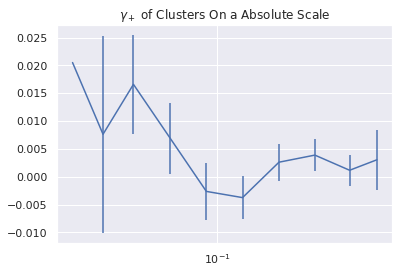

Aggregated xi:
[-2.0512e-02 -1.8178e+00 -1.2864e+01 -9.2751e+00  6.0561e+00  1.5132e+01
 -1.5318e+01 -2.9833e+01 -9.0392e+00 -5.9647e+00]
------------------------------------------------------------------------------
Aggregated meanlogr:
[-4.1936e+00 -9.0309e+02 -2.6320e+03 -3.9039e+03 -5.6254e+03 -7.9541e+03
 -8.7285e+03 -7.8282e+03 -4.3770e+03 -4.0717e+02]
------------------------------------------------------------------------------
Aggregated npairs:
[1.000e+00 2.380e+02 7.750e+02 1.339e+03 2.304e+03 4.042e+03 5.856e+03
 7.670e+03 7.738e+03 1.955e+03]
------------------------------------------------------------------------------
Mean xi:
[-0.0205 -0.0076 -0.0166 -0.0069  0.0026  0.0037 -0.0026 -0.0039 -0.0012
 -0.0031]
------------------------------------------------------------------------------
Mean meanlogr:
[-4.1936 -3.7945 -3.3961 -2.9155 -2.4416 -1.9679 -1.4905 -1.0206 -0.5657
 -0.2083]
------------------------------------------------------------------------------


In [20]:
plt_w_error(mean_abs[1],-mean_abs[0],sig_abs,r"$\gamma_+$ of Clusters On a Absolute Scale ")
print_data(sum_abs,mean_abs)

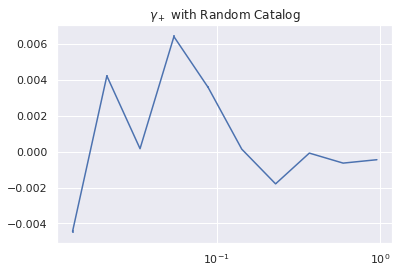

[-4.4456e-03  4.2334e-03  1.7211e-04  6.4249e-03  3.5935e-03  1.4591e-04
 -1.7898e-03 -7.3651e-05 -6.3221e-04 -4.4259e-04]
[ 6.4598e-05 -6.1516e-05 -2.5009e-06 -9.3360e-05 -5.2216e-05 -2.1202e-06
  2.6007e-05  1.0702e-06  9.1867e-06  6.4312e-06]


In [21]:
plt_w_error(r_meanlogr,-r_xi,r_sigma,r"$\gamma_+$ with Random Catalog")
print(-r_xi)
print(r_sigma)

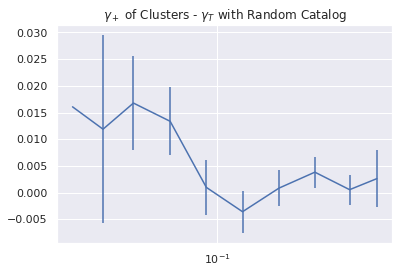

In [22]:
plt_w_error(mean_abs[1],-(mean_abs[0]+r_xi),np.hypot(r_sigma,sig_abs),r"$\gamma_+$ of Clusters - $\gamma_T$ with Random Catalog")

# Rel plots

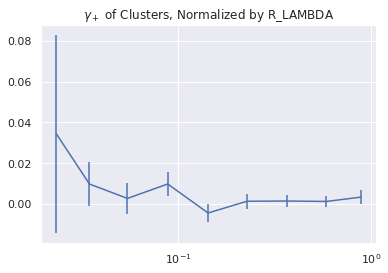

Aggregated xi:
[  0.      -1.4482  -5.285   -2.9439 -17.6837  13.1299  -7.4457 -11.2537
 -11.7957 -18.2183]
------------------------------------------------------------------------------
Aggregated meanlogr:
[    0.      -157.7881 -1791.3528 -2965.7043 -4317.5704 -6032.252
 -7308.3494 -6999.8986 -4441.3485  -643.3478]
------------------------------------------------------------------------------
Aggregated npairs:
[   0.   42.  533. 1020. 1779. 3101. 4935. 6970. 8350. 5188.]
------------------------------------------------------------------------------
Mean xi:
[    nan -0.0345 -0.0099 -0.0029 -0.0099  0.0042 -0.0015 -0.0016 -0.0014
 -0.0035]
------------------------------------------------------------------------------
Mean meanlogr:
[    nan -3.7569 -3.3609 -2.9076 -2.427  -1.9453 -1.4809 -1.0043 -0.5319
 -0.124 ]
------------------------------------------------------------------------------


<Figure size 432x288 with 0 Axes>

In [23]:
plt_w_error(mean_rel[1],-mean_rel[0],sig_rel,r"$\gamma_+$ of Clusters, Normalized by R_LAMBDA")
print_data(sum_rel,mean_rel)